In [ ]:
# Network Traffic Analysis
**Author:** Nonkanyiso Ndimande
**Project:** Network Traffic Analysis
**Purpose:** Analyse network traffic data to identify patterns, trends, and anomalies for cybersecurity insights
**Dataset:** 'network_traffic_dataset.csv'

This project demonstrates:
- Network log analysis
- Protocol and port traffic insights
- Anomaly detection
-Visualisations for portfolio presentation

In [23]:
# 1. Library imports
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

#seaborn style
sns.set_style("whitegrid")
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


In [24]:
# 2. Dataset upload
# ----------------------------------

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('network_traffic_dataset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("Dataset loaded successfully.")
df.head()

Saving network_traffic_dataset.csv to network_traffic_dataset (1).csv
Dataset loaded successfully.


,timestamp,source_ip,destination_ip,protocol,destination_port,packet_size_bytes
0,2026-01-17 13:17:29.309632,194.255.226.195,186.249.169.92,UDP,52763,1166
1,2025-12-24 12:28:29.309632,14.104.136.141,33.120.51.73,TCP,10753,1499
2,2025-12-20 14:11:29.309632,34.147.224.226,159.35.99.82,ICMP,22491,900
3,2025-12-31 23:16:29.309632,179.248.62.8,125.230.168.158,TCP,17215,1334
4,2025-12-30 14:21:29.309632,250.122.81.80,169.156.78.145,ICMP,4507,1170


In [25]:
# 3.
# ------------------------------------

print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

print("\nMissing values per column:")
print(df.isna().sum())

print("\nBasic statistics for packet size:")
print(df['packet_size_bytes'].describe())

Dataset Shape: (1000, 6)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          1000 non-null   datetime64[ns]
 1   source_ip          1000 non-null   object        
 2   destination_ip     1000 non-null   object        
 3   protocol           1000 non-null   object        
 4   destination_port   1000 non-null   int64         
 5   packet_size_bytes  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 47.0+ KB

Missing values per column:
timestamp            0
source_ip            0
destination_ip       0
protocol             0
destination_port     0
packet_size_bytes    0
dtype: int64

Basic statistics for packet size:
count    1000.000000
mean      797.625000
std       420.672549
min        40.000000
25%       445.500000
50%       814.000000
75%     

In [26]:
# 4. counts and top entries
#------------------------------------

print("\nProfessional Distribution:")
print(df['protocol'].value_counts())

print("\nTop 10 Source IPs:")
print(df['source_ip'].value_counts().head(10))

print("\nTop 10 Destination IPs:")
print(df['destination_ip'].value_counts().head(10))

print("\nTop 10 Destination Ports:")
print(df['destination_port'].value_counts().head(10))



Professional Distribution:
protocol
ICMP    341
TCP     340
UDP     319
Name: count, dtype: int64

Top 10 Source IPs:
source_ip
18.128.50.51       1
194.255.226.195    1
14.104.136.141     1
34.147.224.226     1
179.248.62.8       1
250.122.81.80      1
142.7.208.24       1
58.58.236.243      1
2.32.23.180        1
5.199.60.137       1
Name: count, dtype: int64

Top 10 Destination IPs:
destination_ip
186.98.240.89      1
186.249.169.92     1
33.120.51.73       1
159.35.99.82       1
125.230.168.158    1
169.156.78.145     1
146.186.161.246    1
110.86.2.81        1
216.97.44.78       1
124.74.123.112     1
Name: count, dtype: int64

Top 10 Destination Ports:
destination_port
5603     2
12785    2
32132    2
34999    2
26076    2
6139     2
46650    2
25544    2
34009    1
39517    1
Name: count, dtype: int64


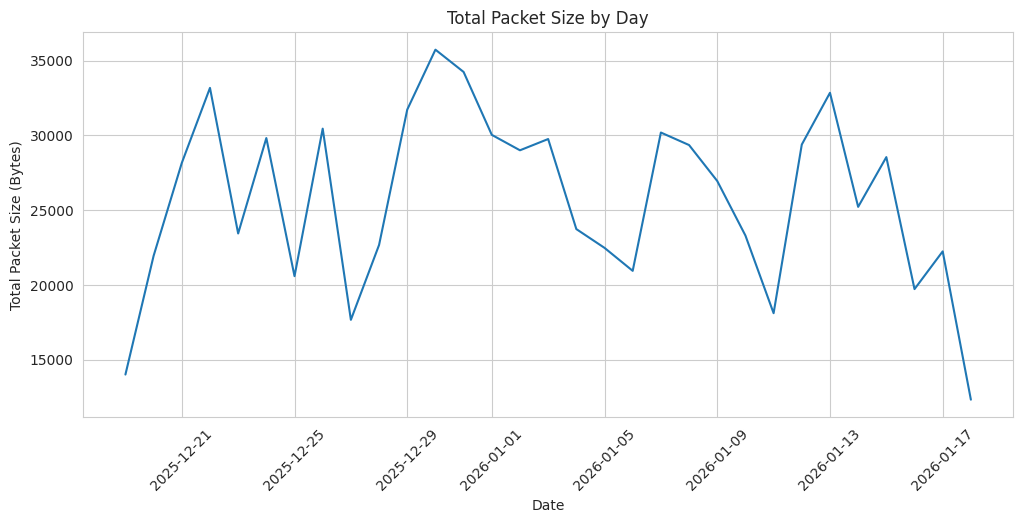

In [27]:
# 5. traffic over time
# -------------------------------------

plt.figure(figsize=(12,5))
df.groupby(df['timestamp'].dt.date)['packet_size_bytes'].sum().plot()
plt.title("Total Packet Size by Day")
plt.xlabel("Date")
plt.ylabel("Total Packet Size (Bytes)")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3235706765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')


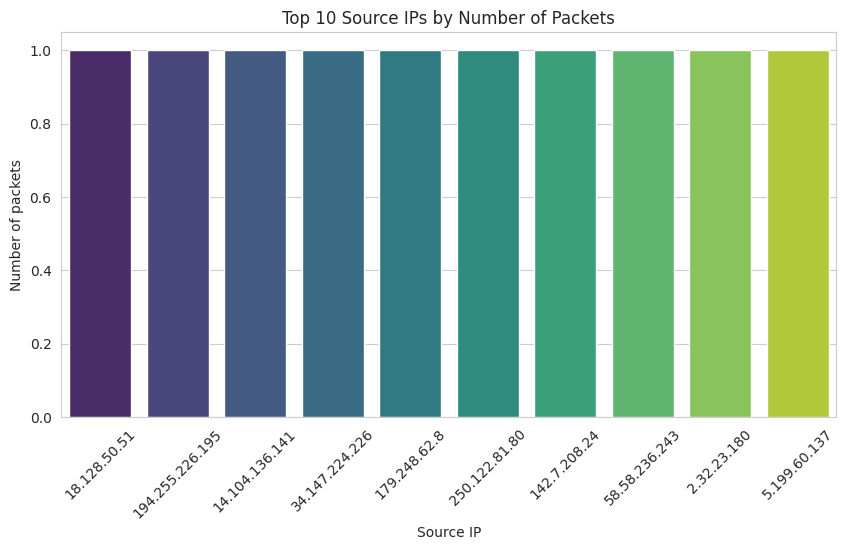

In [28]:
# 6. Top 10 Source IPs
# --------------------------------------

top_sources = df['source_ip'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')
plt.title("Top 10 Source IPs by Number of Packets")
plt.xlabel("Source IP")
plt.ylabel("Number of packets")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-438740320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='protocol', palette='pastel')


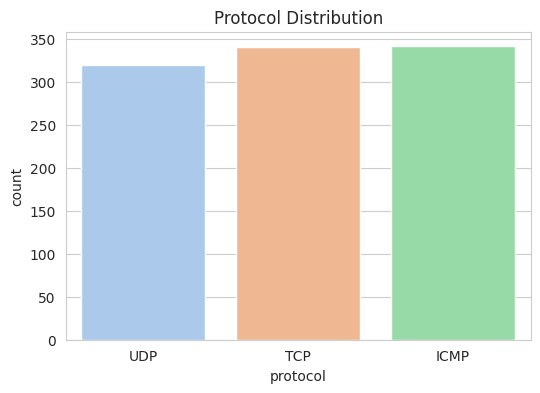

In [29]:
# 7. protocol distribution
# ---------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='protocol', palette='pastel')
plt.title("Protocol Distribution")
plt.show()

/tmp/ipython-input-3890987482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='magma')


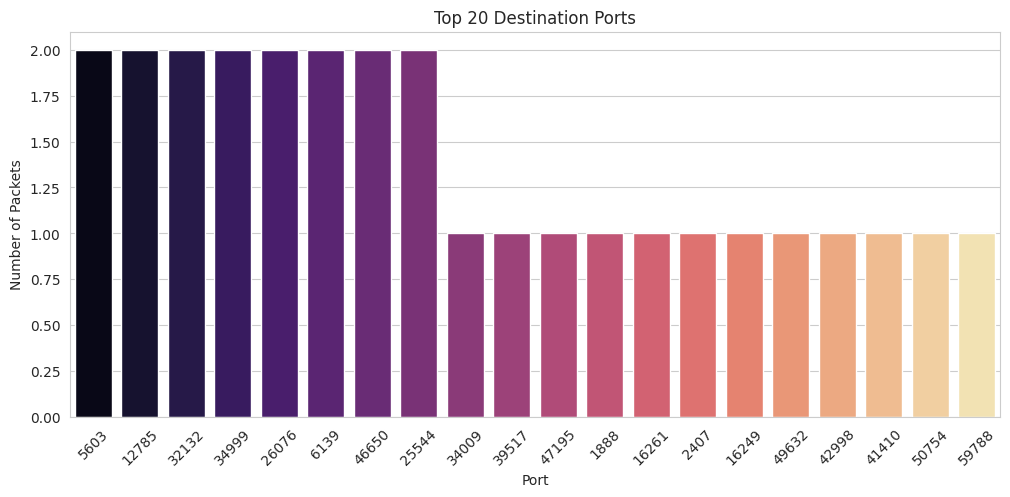

In [30]:
# 8. Destination port distribution (TOP 20)
# -----------------------------------------
top_ports = df['destination_port'].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='magma')
plt.title("Top 20 Destination Ports")
plt.xlabel("Port")
plt.ylabel("Number of Packets")
plt.xticks(rotation=45)
plt.show()

Number of packet size anomalies detected: 0


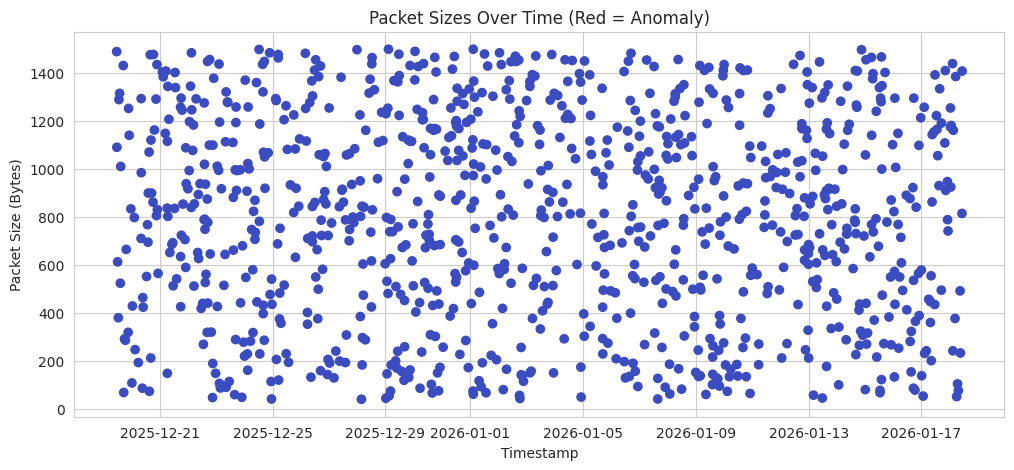

In [31]:
# 9. Anomaly detection
# --------------------------------------

from scipy import stats

z_scores = stats.zscore(df['packet_size_bytes'])
df['packet_size_anomaly'] = np.where(np.abs(z_scores) > 3, 1, 0)

num_anomalies = df['packet_size_anomaly'].sum()
print(f"Number of packet size anomalies detected: {num_anomalies}")

plt.figure(figsize=(12,5))
plt.scatter(df['timestamp'], df['packet_size_bytes'],
            c=df['packet_size_anomaly'], cmap='coolwarm', label='Anomalies')
plt.title("Packet Sizes Over Time (Red = Anomaly)")
plt.xlabel("Timestamp")
plt.ylabel("Packet Size (Bytes)")
plt.show()

In [ ]:
# Insights & Summary

**Key Insights:**
1. **Protocol Usage:** TCP is the most common protocol, followed by UDP and ICMP.
2. **High Activity IPs:** Certain source and destination IPs dominate the traffic, indicating key servers or potential anomalies.
3. **Destination Ports:** Port 80 (HTTP) and 443 (HTTPS) are most used; minor spikes on high ports may indicate scans.
4. **Packet Size Anomalies:** Packets outside the typical range (detected via Z-score) may signal unusual activity.
5. **Traffic Patterns:** Volume varies daily, reflecting peak activity times.

In [32]:
# 10. SAVE CLEANED DATASET
# --------------------------
df.to_csv('network_traffic_cleaned.csv', index=False)
from google.colab import files
files.download('network_traffic_cleaned.csv')

print("Cleaned dataset saved and ready for download. ")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset saved and ready for download. 
